In [1]:
# Recursive Feature Elimination with Cross Validation

import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

my_df = pd.read_csv("feature_selection_sample_data.csv")

In [3]:
X = my_df.drop(["output"], axis=1)
y = my_df["output"]

In [5]:
regressor = LinearRegression()
feature_selector = RFECV(regressor)

In [7]:
fit = feature_selector.fit(X, y)

In [9]:
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

Optimal number of features: 2


In [11]:
X_new = X.loc[:, feature_selector.get_support()]
X_new

,input1,input2
0,534,536
1,264,103
2,272,339
3,416,444
4,520,464
5,81,415
6,380,386
7,549,596
8,431,364
9,574,611


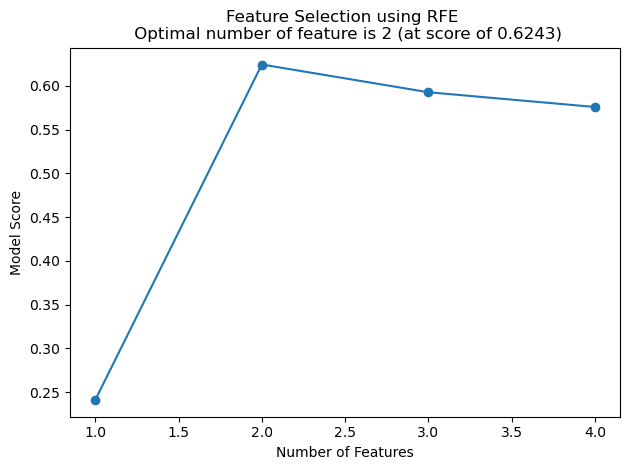

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(fit.cv_results_["mean_test_score"]) + 1), fit.cv_results_["mean_test_score"], marker="o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of feature is {optimal_feature_count} (at score of {round(max(fit.cv_results_["mean_test_score"]), 4)})")
plt.tight_layout()
plt.show()